In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# For demonstration, we will create a sample dataframe to include coordinates
np.random.seed(0)  # For reproducible results

df = pd.DataFrame({
    '_longitude': np.concatenate([np.random.normal(loc=2.44, scale=0.01, size=1000), np.array([2.35, 2.36])]),
    '_latitude': np.concatenate([np.random.normal(loc=6.37, scale=0.01, size=1000), np.array([6.385, 6.39])])
})

In [3]:
def mad_based_outlier(points, threshold=3):
  # The heart of our map: the median.
  median = np.median(points)
  # How far off the path each point is.
  deviation = np.abs(points - median)
  # The 'average' deviation in our landscape.
  mad = np.median(deviation)
  # A score to identify those who wander too far.
  modified_z_score = 0.6745 * deviation / mad
  return modified_z_score > threshold

In [4]:
# Implement the mad_based_outlier function to check for outliers in both longitude and latitude
outliers_longitude = mad_based_outlier(df['_longitude'])
outliers_latitude = mad_based_outlier(df['_latitude'])

In [5]:
# Combine the latitude and longitude to plot the outliers
outliers = outliers_longitude | outliers_latitude

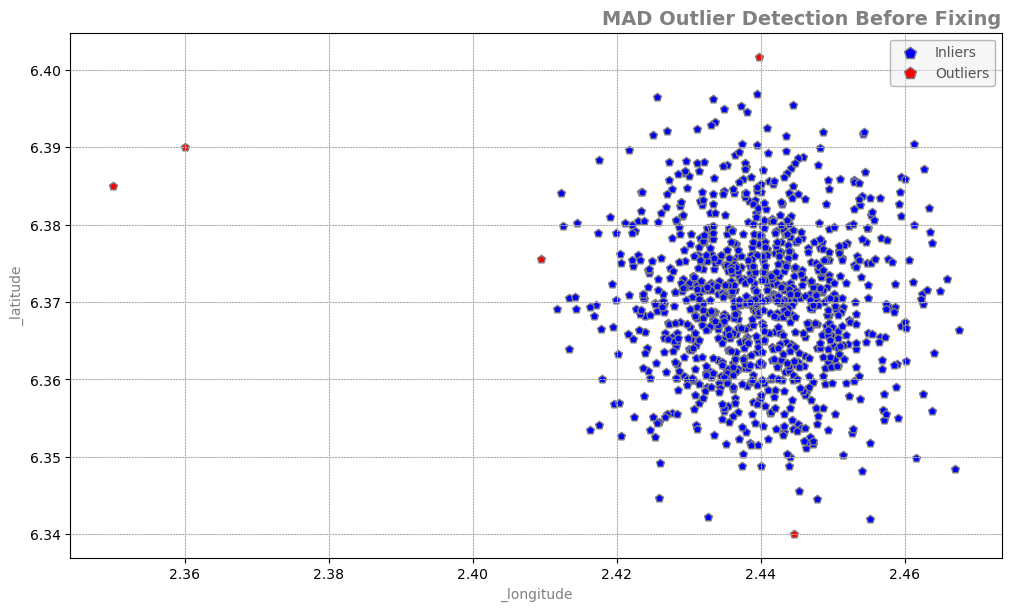

In [6]:
# Plot geopoints before fixing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df[~outliers]['_longitude'], df[~outliers]['_latitude'], c='blue', label='Inliers')
plt.scatter(df[outliers]['_longitude'], df[outliers]['_latitude'], c='red', label='Outliers')
plt.xlabel('_longitude')
plt.ylabel('_latitude')
plt.title('MAD Outlier Detection Before Fixing')
plt.legend()
plt.show()

In [7]:
# replace outliers with median value of inliers
df.loc[outliers, '_longitude'] = df.loc[~outliers, '_longitude'].median()
df.loc[outliers, '_latitude'] = df.loc[~outliers, '_latitude'].median()

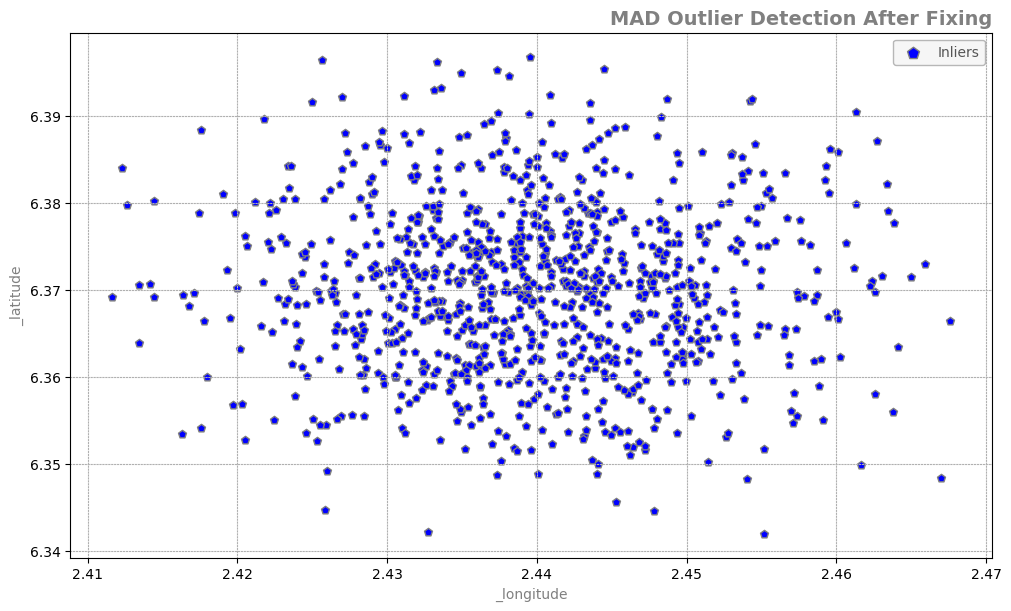

In [8]:
# Plot geopoints after fixing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['_longitude'], df['_latitude'], c='blue', label='Inliers')
plt.xlabel('_longitude')
plt.ylabel('_latitude')
plt.title('MAD Outlier Detection After Fixing')
plt.legend()
plt.show()